## Programming Exercise 5 - Regularized Linear Regression and Bias v.s. Variance

In [12]:
# %load ../../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# load MATLAB files
from scipy.io import loadmat

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [5]:
data = loadmat('data/ex5data1.mat')
data.keys()

dict_keys(['X', 'y', '__header__', '__version__', 'ytest', 'Xtest', 'Xval', 'yval', '__globals__'])

In [29]:
y_train = data['y']
X_train = np.c_[np.ones_like(data['X']), data['X']]

print('X:', X_train.shape)
print('y:', y_train.shape)

X: (12, 2)
y: (12, 1)


### Regularized Linear Regression

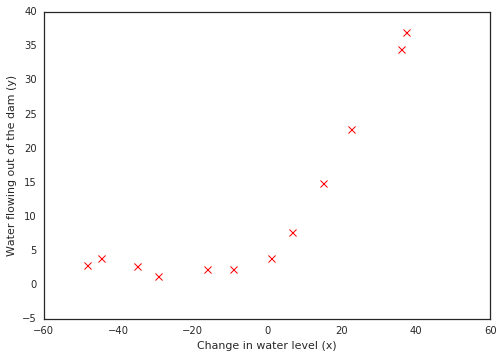

In [17]:
plt.scatter(X_train, y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)');

In [111]:
def linearRegCostFunction(X, y, theta, reg=0):
    m = y.size
    h = X.dot(theta)
       
    J = 1/(2*m)*np.sum(((h-y)**2)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    theta[0] = 0
    grad = (1/m)*(X.T.dot(h-y)) + (reg/m)*theta
            
    return(J, grad)    

In [112]:
initial_theta = np.array([[1],[1]])
cost, gradient = linearRegCostFunction(X_train, y_train, initial_theta, 1)
print(cost)
print(gradient)

303.99319222
[[ -15.30301567]
 [ 598.25074417]]
